In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df=pd.read_csv('/home/arjun/Downloads/covid.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [2]:
df.shape

(211366, 67)

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.028220e+05,2.025960e+05,2.014190e+05,1.840460e+05,184013.000000,182841.000000,201891.000000,201665.000000,200493.000000,183128.000000,...,131459.000000,129658.000000,85362.000000,154421.000000,197750.000000,169290.000000,7.133000e+03,7133.000000,7153.000000,7133.000000
mean,3.972870e+06,1.262044e+04,1.264088e+04,7.062166e+04,146.238358,146.956828,52547.758271,190.103099,190.064813,652.570854,...,10.657864,32.802441,50.863540,3.084434,73.639459,0.724951,4.540537e+04,9.686167,14.602563,1249.933634
std,2.491792e+07,8.712230e+04,8.511913e+04,3.650367e+05,754.450195,739.734790,95328.666748,949.398083,620.614469,940.795651,...,10.601986,13.534495,31.844668,2.550776,7.447863,0.149701,1.268598e+05,13.724070,27.001289,1662.209599
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,3.665000e+03,0.000000e+00,6.714000e+00,1.060000e+02,0.000000,0.143000,940.841000,0.000000,1.473000,27.068000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.670000e+01,0.230000,-0.280000,10.629403
50%,4.361000e+04,6.300000e+01,1.004290e+02,1.068000e+03,1.000000,1.714000,8685.423000,8.957000,20.179000,190.870000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.320800e+03,7.200000,7.220000,703.114715
75%,4.674968e+05,1.007000e+03,1.159143e+03,9.233000e+03,15.000000,17.000000,63855.717000,102.423000,137.572000,964.680000,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.247450e+04,15.330000,20.420000,1964.233723
max,5.992934e+08,4.078820e+06,3.436384e+06,6.481405e+06,17753.000000,14864.714000,655309.333000,195005.313000,35258.843000,6391.309000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.180000,9750.477354


In [6]:
df.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [7]:
df.shape

(211366, 64)

In [8]:
df.rename(columns={'date':'Date','location':'Country','continent':'Continent','iso_code':'Iso_code'},inplace=True)
df.head()

,Iso_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [9]:
continents=list(df.Continent.unique())
len(continents)

7

In [10]:
imputer=SimpleImputer(strategy='constant')
df1=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df1

,Iso_code,Continent,Country,Date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211361,ZWE,Africa,Zimbabwe,2022-08-21,256624.0,8.0,12.143,5592.0,0.0,0.759,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
211362,ZWE,Africa,Zimbabwe,2022-08-22,256628.0,4.0,12.0,5592.0,0.0,0.75,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
211363,ZWE,Africa,Zimbabwe,2022-08-23,256628.0,0.0,9.571,5592.0,0.0,0.598,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
211364,ZWE,Africa,Zimbabwe,2022-08-24,256628.0,0.0,9.0,5592.0,0.0,0.563,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value


In [11]:
df2=df1.groupby(['Date','Country']) [['total_cases','total_deaths','total_vaccinations']].sum().reset_index()
df2

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value
...,...,...,...,...,...
211361,2022-08-25,Wallis and Futuna,761.0,7.0,missing_value
211362,2022-08-25,World,599293387.0,6481405.0,12520277066.0
211363,2022-08-25,Yemen,11922.0,2155.0,missing_value
211364,2022-08-25,Zambia,332710.0,4016.0,missing_value


In [12]:
df2['total_cases'].replace({'missing_value':0},inplace=True)
df2['total_deaths'].replace({'missing_value':0},inplace=True)
df2['total_vaccinations'].replace({'missing_value':0},inplace=True)
df2

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Argentina,0.0,0.0,0.000000e+00
...,...,...,...,...,...
211361,2022-08-25,Wallis and Futuna,761.0,7.0,0.000000e+00
211362,2022-08-25,World,599293387.0,6481405.0,1.252028e+10
211363,2022-08-25,Yemen,11922.0,2155.0,0.000000e+00
211364,2022-08-25,Zambia,332710.0,4016.0,0.000000e+00


In [13]:
df3=df2[df2['total_deaths']>100000]
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
8561,2020-04-08,World,1475143.0,100525.0,0.000000e+00
8779,2020-04-09,World,1561899.0,108632.0,0.000000e+00
8871,2020-04-10,High income,1322125.0,102541.0,0.000000e+00
8997,2020-04-10,World,1648415.0,116345.0,0.000000e+00
9090,2020-04-11,High income,1380899.0,108850.0,0.000000e+00
...,...,...,...,...,...
211350,2022-08-25,Ukraine,5325288.0,116580.0,0.000000e+00
211352,2022-08-25,United Kingdom,23492875.0,204699.0,0.000000e+00
211353,2022-08-25,United States,94028125.0,1043089.0,0.000000e+00
211354,2022-08-25,Upper middle income,140263895.0,2563750.0,5.299093e+09


In [14]:
countries=df3['Country'].unique()
len(countries)

29

In [15]:
cd10=list(df3.Country.unique())
cd10

['World',
 'High income',
 'Europe',
 'European Union',
 'North America',
 'United States',
 'Upper middle income',
 'South America',
 'Asia',
 'Brazil',
 'Lower middle income',
 'India',
 'Mexico',
 'United Kingdom',
 'Peru',
 'Africa',
 'Italy',
 'Russia',
 'France',
 'Colombia',
 'Argentina',
 'Indonesia',
 'Iran',
 'Germany',
 'Ukraine',
 'Poland',
 'Spain',
 'South Africa',
 'Turkey']

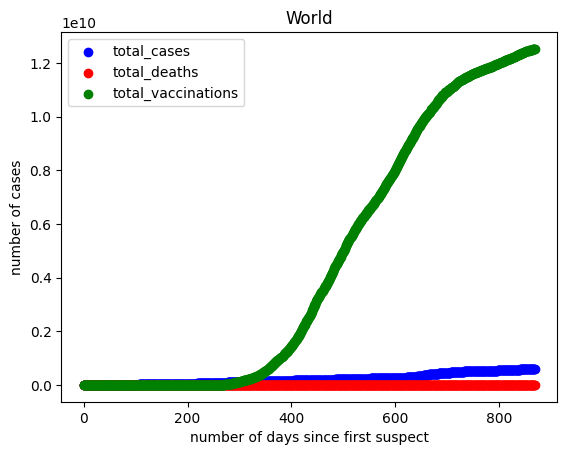

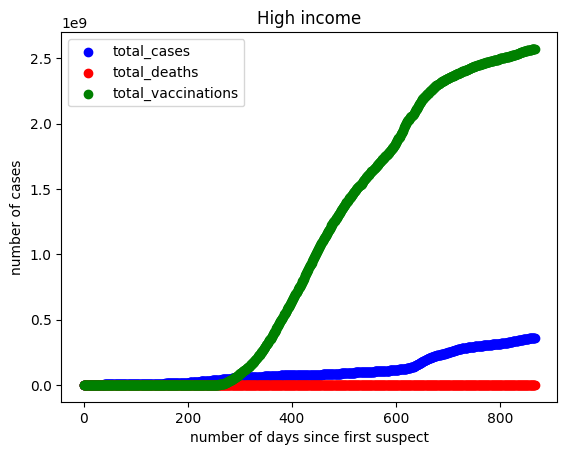

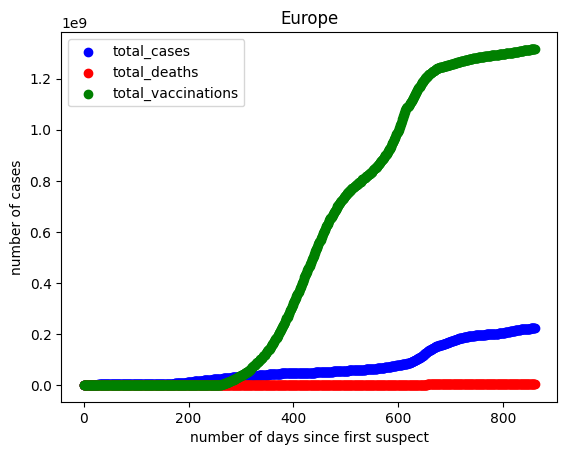

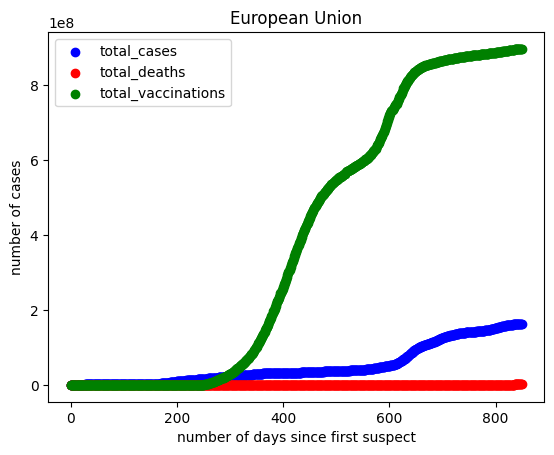

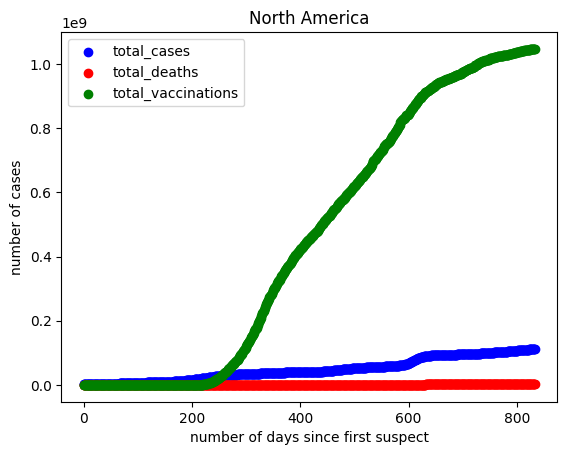

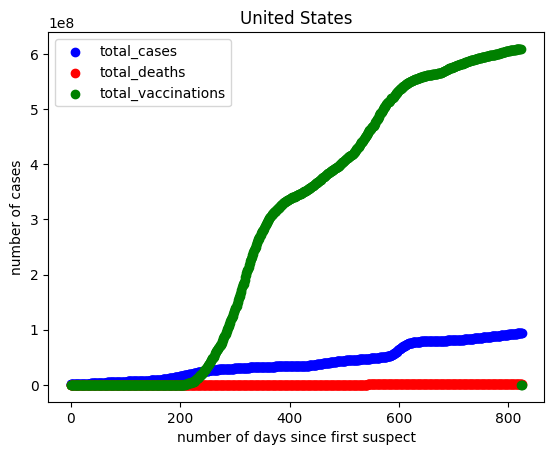

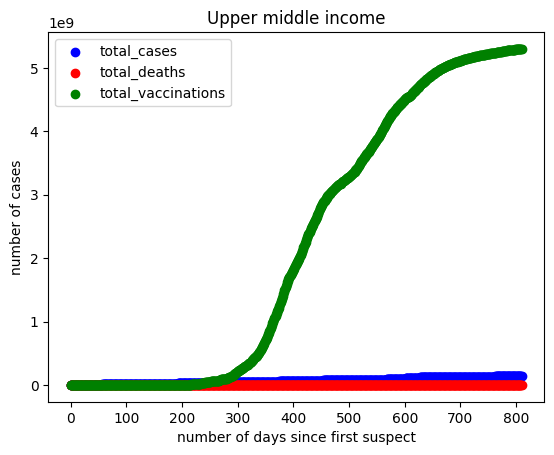

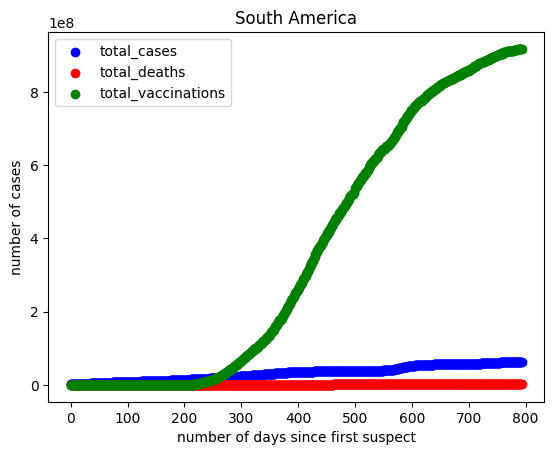

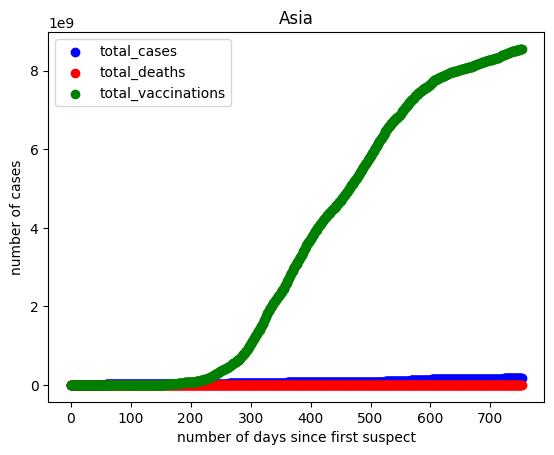

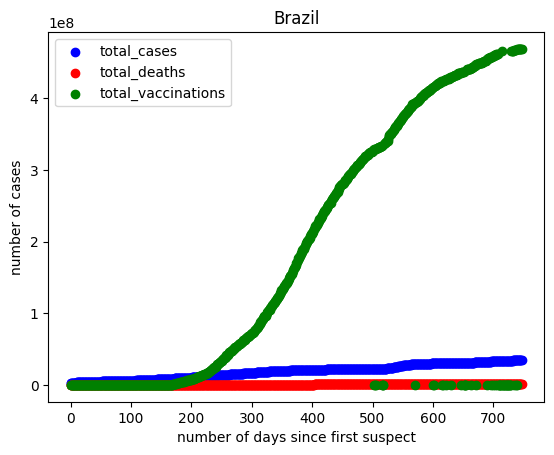

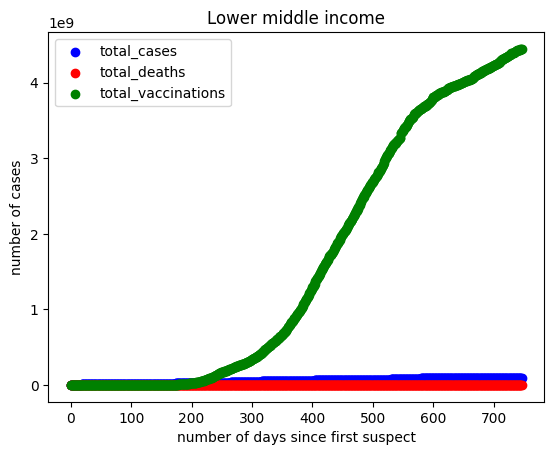

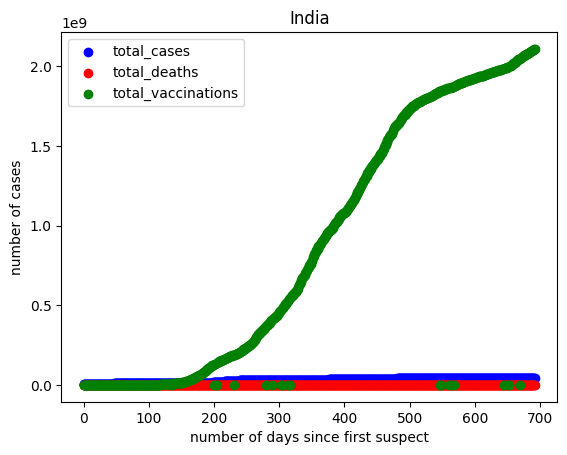

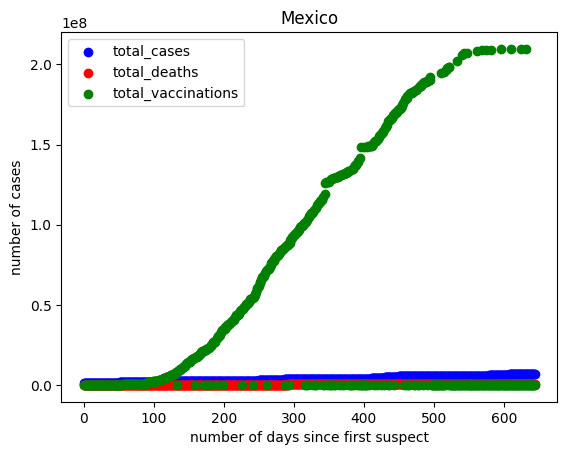

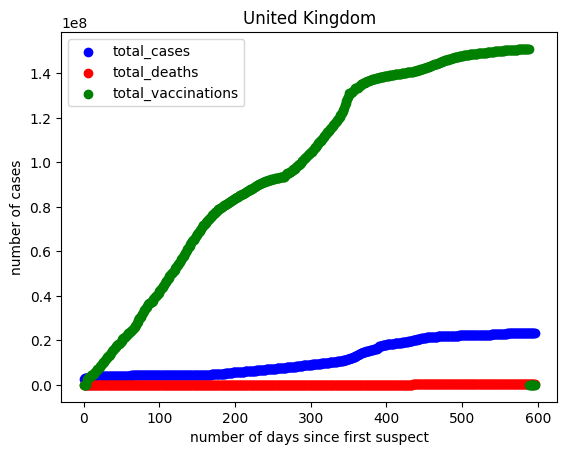

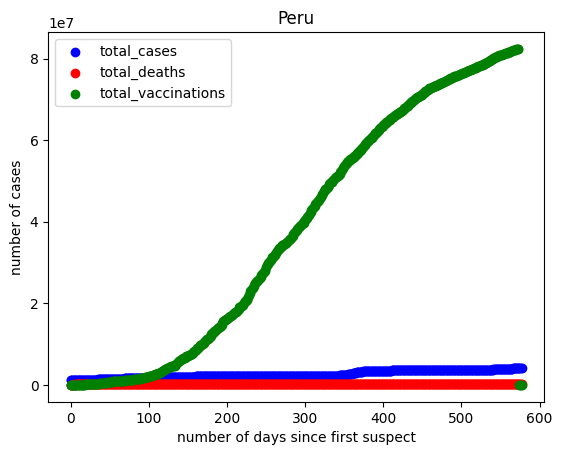

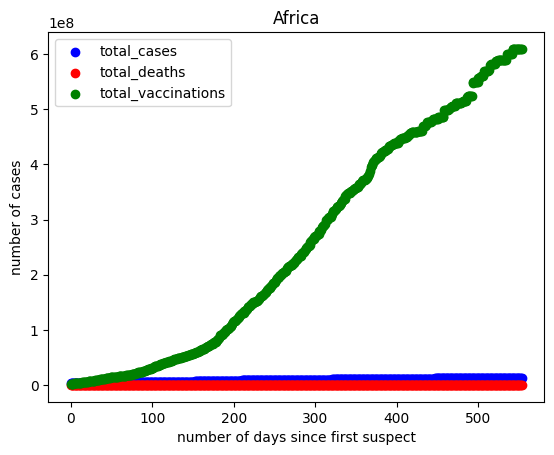

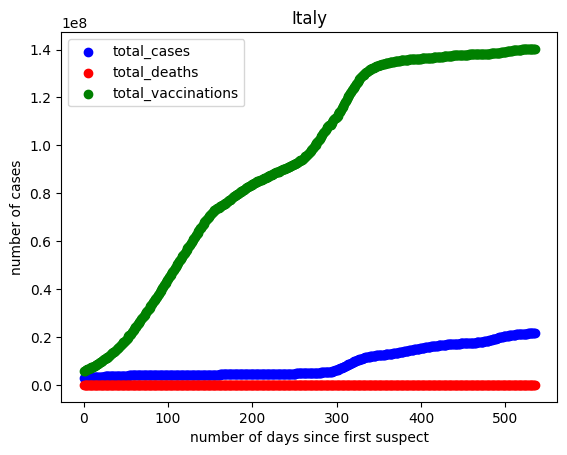

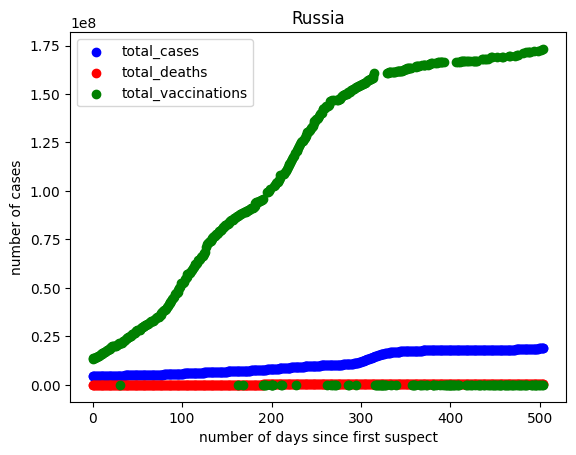

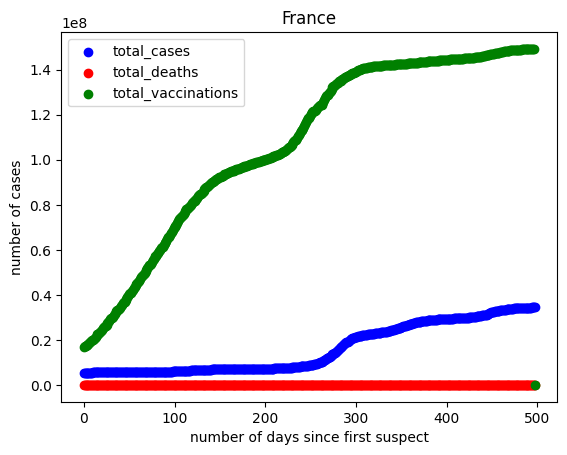

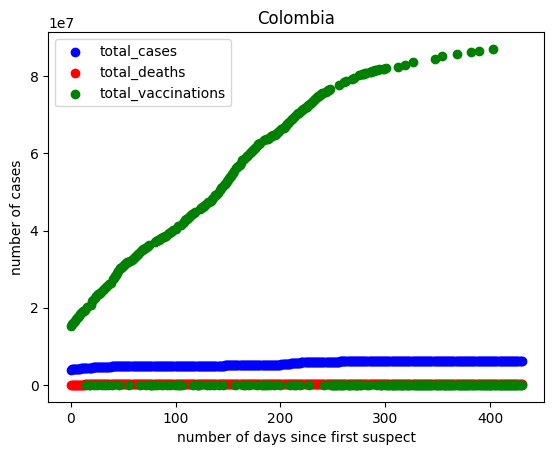

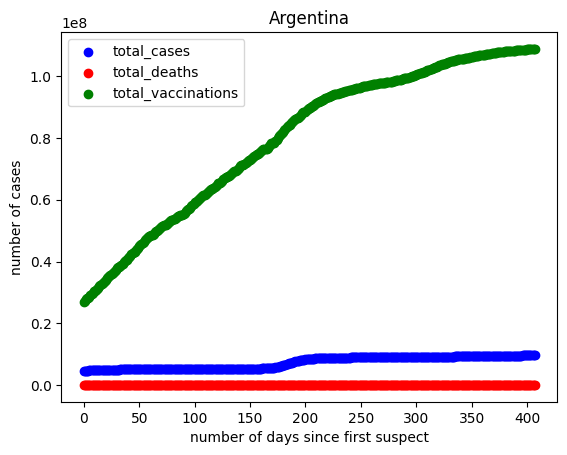

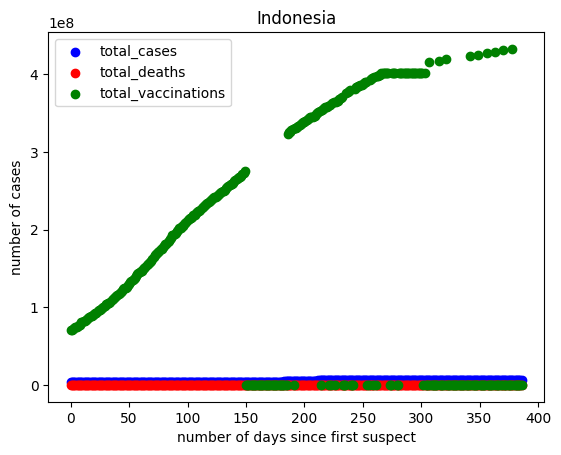

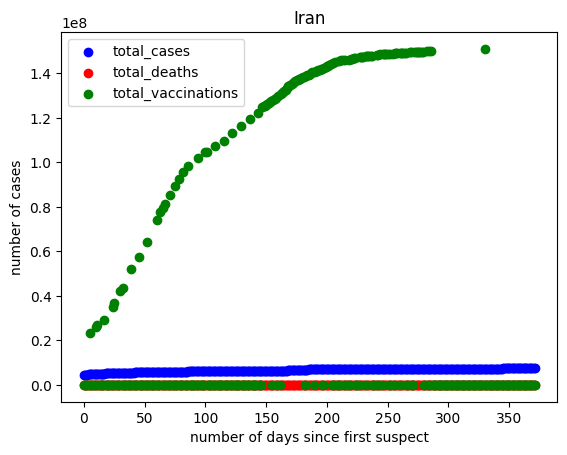

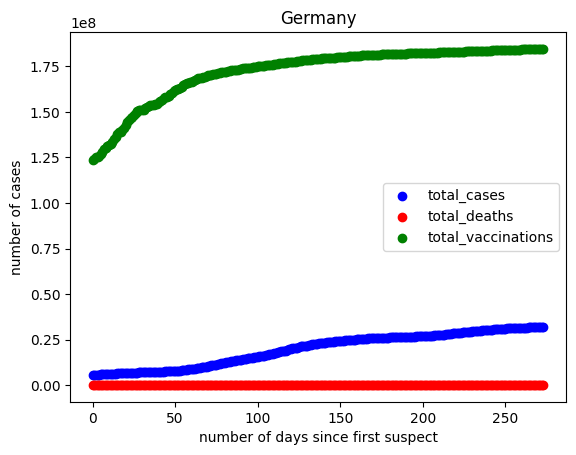

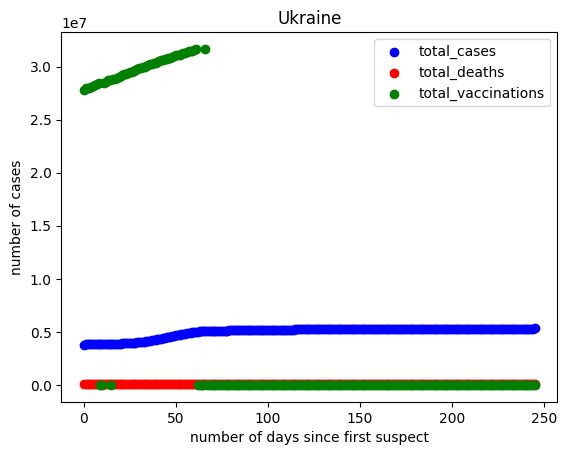

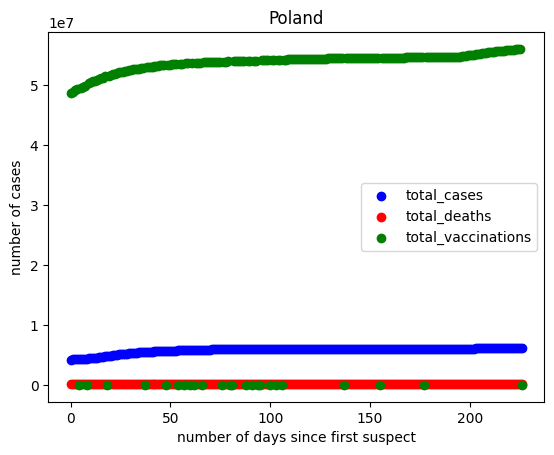

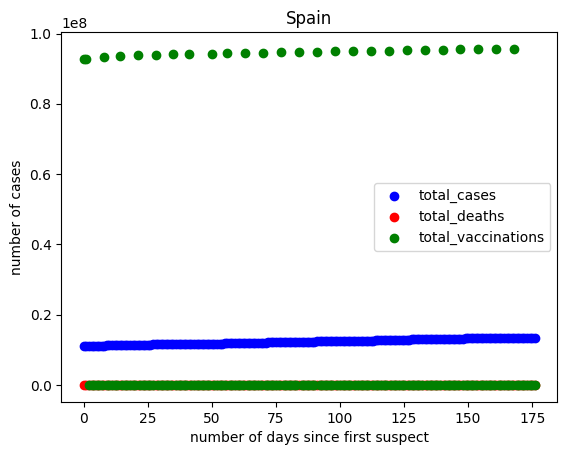

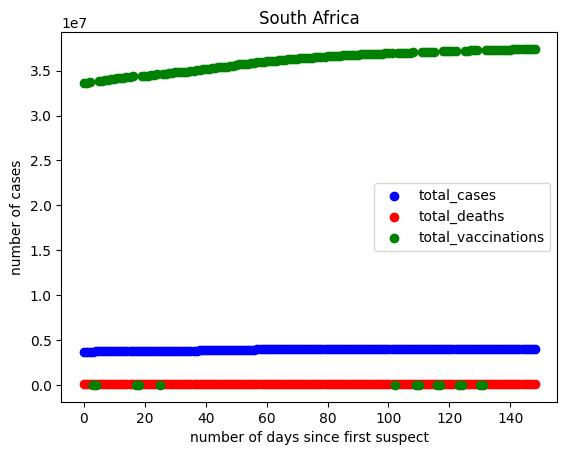

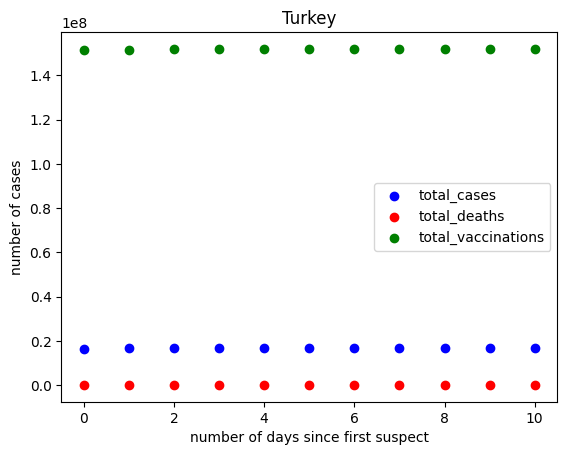

In [16]:
for idx in range(0,len(countries)):
    C=df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['total_cases'],color='blue',label='total_cases')
    plt.scatter(np.arange(0,len(C)),C['total_deaths'],color="red",label="total_deaths")
    plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color="green",label="total_vaccinations")
    plt.title(countries[idx])
    plt.xlabel("number of days since first suspect")
    plt.ylabel("number of cases")
    plt.legend()
    plt.show()

In [17]:
df4= df3.groupby(['Country'])[['Country','total_cases','total_deaths']].sum().reset_index()

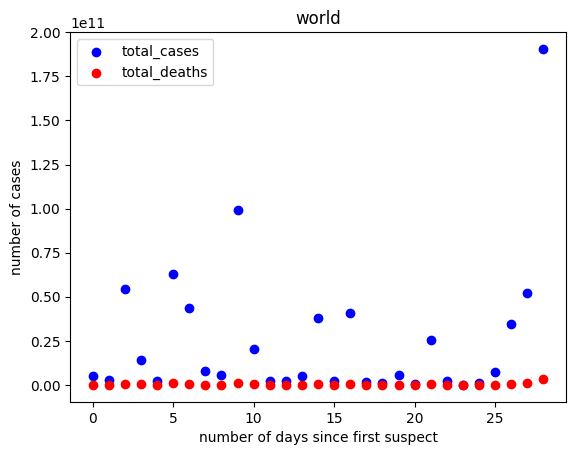

In [18]:
C=df4
plt.scatter(np.arange(0,len(C)),C['total_cases'],color="blue",label="total_cases")
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color="red",label="total_deaths")
plt.title("world")
plt.xlabel("number of days since first suspect")
plt.ylabel("number of cases")
plt.legend()
plt.show()

In [19]:
date=df3['Date'].unique()
len(date)

870

In [20]:
df5=df3.groupby(['Date'])[['Date','total_cases','total_deaths']].sum().reset_index()

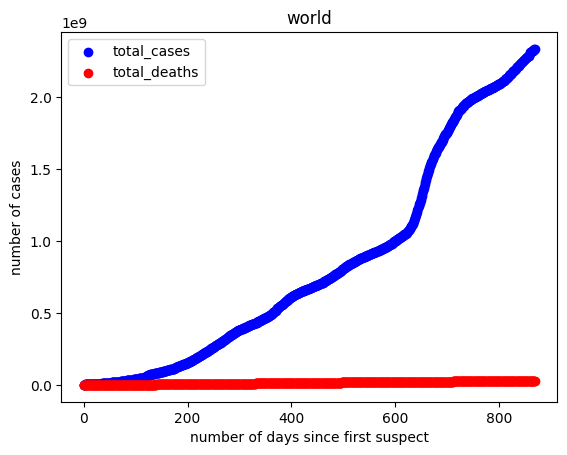

In [21]:
C=df5
plt.scatter(np.arange(0,len(C)),C['total_cases'],color="blue",label="total_cases")
plt.scatter(np.arange(0,len(C)),C['total_deaths'],color="red",label="total_deaths")
plt.title("world")
plt.xlabel("number of days since first suspect")
plt.ylabel("number of cases")
plt.legend()
plt.show()